In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
s17_SDSS_path = '../data/serenelli2017/s17_SDSS.csv'
s17_ASPC_path = '../data/serenelli2017/s17_ASPC.csv'
b18_path = '../data/berger2018/b18.csv'

In [4]:
s17_sdss = pd.read_csv(s17_SDSS_path)
s17_sdss.head()

,KIC,Teff,eTeff,[M/H],e[M/H],Radius,+eRad,-eRad,syRad,Mass,...,-elogg,sylogg,rho,+erho,-erho,syrho,Age,+eAge,-eAge,syAge
0,1435467,6433.0,86.0,-0.028,0.099,1.693,0.015,-0.016,0.010,1.344,...,-0.006,0.002,0.27770,0.002376,-0.002391,0.001505,2.605,0.302,-0.293,0.215
1,2010607,6361.0,71.0,-0.070,0.100,2.410,0.100,-0.090,0.035,1.402,...,-0.027,0.003,0.09973,0.009867,-0.009399,0.001393,2.755,0.296,-0.301,0.184
2,2309595,5238.0,65.0,-0.095,0.101,2.423,0.076,-0.073,0.022,1.167,...,-0.008,0.002,0.08183,0.002543,-0.002494,0.000710,5.460,1.351,-1.023,0.422
3,2450729,6029.0,59.0,-0.212,0.100,1.758,0.059,-0.056,0.023,1.112,...,-0.021,0.006,0.20430,0.015940,-0.014980,0.002889,6.034,0.804,-0.718,0.550
4,2837475,6688.0,57.0,-0.015,0.100,1.710,0.022,-0.043,0.039,1.665,...,-0.011,0.006,0.33190,0.002563,-0.002835,0.006216,1.131,0.197,-0.181,0.221


In [6]:
s17_aspc = pd.read_csv(s17_ASPC_path)
s17_aspc.head()

,KIC,Teff,eTeff,[M/H],e[M/H],Radius,+eRad,-eRad,syRad,Mass,...,-elogg,sylogg,rho,+erho,-erho,syrho,Age,+eAge,-eAge,syAge
0,1435467,6096.7,69.276,-0.028,0.099,1.676,0.012,-0.011,0.013,1.277,...,-0.005,0.004,0.27110,0.001138,-0.001015,0.001526,3.746,0.349,-0.324,0.496
1,2010607,6013.5,69.276,-0.070,0.100,2.390,0.104,-0.095,0.028,1.325,...,-0.027,0.006,0.09667,0.009696,-0.009474,0.001512,3.544,0.396,-0.390,0.333
2,2309595,5000.2,69.276,-0.095,0.101,2.300,0.080,-0.073,0.063,1.022,...,-0.008,0.007,0.08390,0.002592,-0.002614,0.001254,9.537,2.667,-2.196,2.517
3,2450729,5840.4,69.276,-0.212,0.100,1.725,0.060,-0.056,0.028,1.047,...,-0.021,0.007,0.20350,0.015640,-0.015730,0.002757,7.724,1.051,-0.953,1.221
4,2837475,6335.4,69.276,-0.015,0.100,1.726,0.065,-0.014,0.067,1.672,...,-0.007,0.020,0.32450,0.002867,-0.002731,0.003638,1.804,0.313,-0.285,0.529


In [9]:
b18 = pd.read_csv(b18_path)
b18.head()

,KIC,Gaia,Teff,e_Teff,D,+e_D,-e_D,R,+e_R,-e_R,AV,Evol,Bin
0,757076,2050233807328471424,5164,181,658.465,21.419,20.163,3.986,0.324,0.293,0.273,1,0
1,757099,2050233601176543104,5521,193,369.374,3.708,3.645,1.053,0.078,0.071,0.120,0,0
2,757137,2050230543159814656,4751,166,570.715,8.271,8.060,13.406,1.004,0.916,0.230,2,0
3,757280,2050230611879323904,6543,229,824.791,15.079,14.586,2.687,0.205,0.186,0.323,0,0
4,757450,2050231848829944320,5306,106,835.371,18.423,17.692,0.962,0.047,0.044,0.298,0,0


In [11]:
df = s17_sdss.merge(s17_aspc, on='KIC', suffixes=('_SDSS', '_ASPC')).merge(b18, on='KIC')
df.head()

,KIC,Teff_SDSS,eTeff_SDSS,[M/H]_SDSS,e[M/H]_SDSS,Radius_SDSS,+eRad_SDSS,-eRad_SDSS,syRad_SDSS,Mass_SDSS,...,e_Teff,D,+e_D,-e_D,R,+e_R,-e_R,AV,Evol,Bin
0,1435467,6433.0,86.0,-0.028,0.099,1.693,0.015,-0.016,0.010,1.344,...,127,136.664,0.560,0.557,1.695,0.071,0.067,0.023,1,0
1,2010607,6361.0,71.0,-0.070,0.100,2.410,0.100,-0.090,0.035,1.402,...,125,622.215,10.280,9.978,2.567,0.116,0.110,0.240,1,0
2,2309595,5238.0,65.0,-0.095,0.101,2.423,0.076,-0.073,0.022,1.167,...,103,388.066,4.202,4.124,2.397,0.104,0.098,0.130,1,0
3,2450729,6029.0,59.0,-0.212,0.100,1.758,0.059,-0.056,0.023,1.112,...,117,272.828,2.175,2.147,1.735,0.074,0.070,0.163,1,0
4,2837475,6688.0,57.0,-0.015,0.100,1.710,0.022,-0.043,0.039,1.665,...,132,120.809,0.420,0.418,1.646,0.071,0.067,0.042,0,0


In [12]:
df.to_csv('../data/archive/s17-b18.csv', index=False)

## Comparisons

Some qualatitive comparisons between the results.

Serenelli et al. (2017) used grid-based modelling and Berger et al. (2018) used direct relations between observables via `isoclassify`.

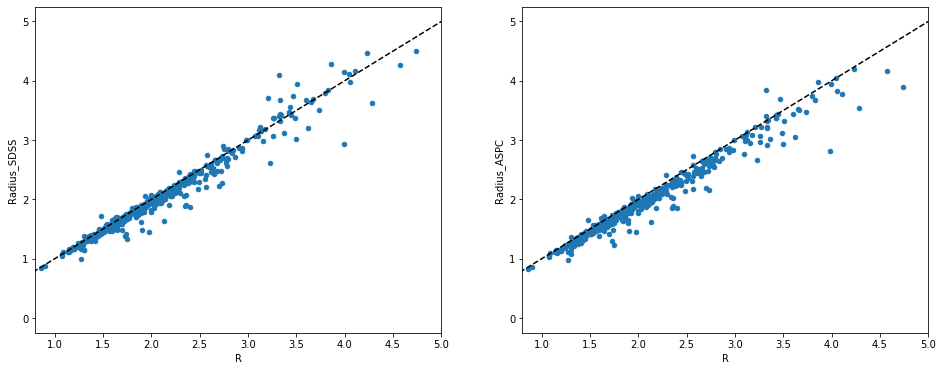

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
df.plot(ax=axes[0], kind='scatter', x='R', y='Radius_SDSS')
df.plot(ax=axes[1], kind='scatter', x='R', y='Radius_ASPC')

for ax in axes:
    ax.plot(np.arange(6), 'k--')
    ax.set_xlim(0.8, 5.0)

Both temperature scales of S17 get lower radii than B18. With the direct method, there is a strong temperature dependence on luminosity and hence radius. We probe this below.

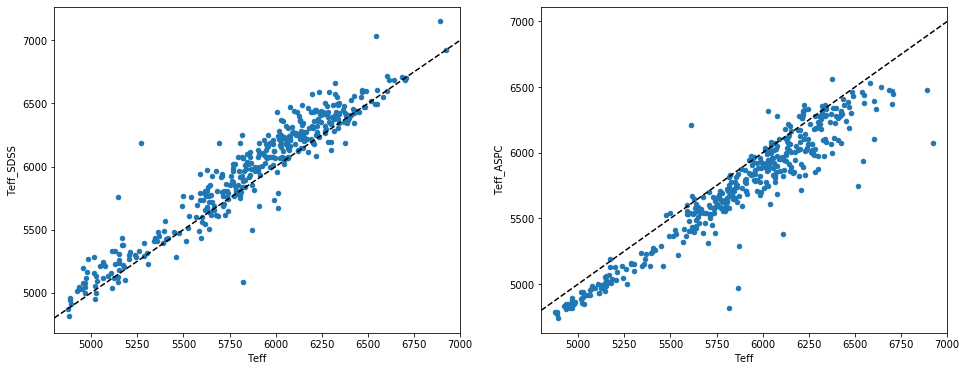

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
total.plot(ax=axes[0], kind='scatter', x='Teff', y='Teff_SDSS')
total.plot(ax=axes[1], kind='scatter', x='Teff', y='Teff_ASPC')

teff = [4800, 7000]
for ax in axes:
    ax.plot(np.linspace(*teff, 10), np.linspace(*teff, 10), 'k--')
    ax.set_xlim(teff)

The B18 temperature scale is between the SDSS and ASPCAP temperature scales of S17. S17 corrects for the temperature offset in their models, hence consistend radii.

Lets have a look at their evolutionary classifications from B18.

0 = dwarf

1 = subgiant

2 = red giant branch

3 = red clump

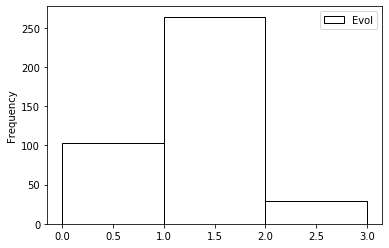

In [16]:
df.plot(kind='hist', y='Evol', bins=[0, 1, 2, 3], edgecolor='k', facecolor='none')

Now lets plot a Kiel diagram colouring by the classification.

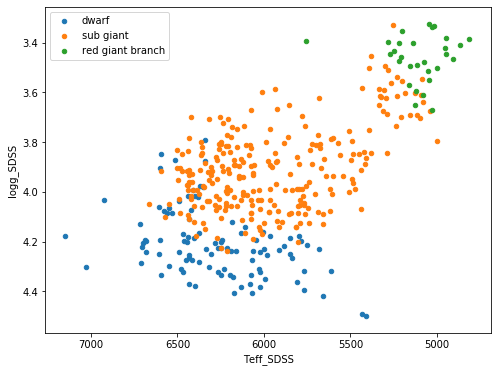

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

for i, stage in zip([0, 1, 2], ['dwarf', 'sub giant', 'red giant branch']):
    df[df['Evol']==i].plot(ax=ax, kind='scatter', x='Teff_SDSS', y='logg_SDSS',
                                 c=f'C{i}', label=stage)

ax.invert_xaxis()
ax.invert_yaxis()

A cut in $\log g$ of less than 3.5 would remove most of the red giants, but not all. It may be best to cut using a line in both $T_\mathrm{eff}$ and $\log g$.